In [1]:
1+1

2

In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [5]:
class BMIState(TypedDict):
    weight_kg : float
    height_m : float
    bmi : float
    category : str

    

In [6]:
def cal_bmi(state: BMIState) -> BMIState:

    weight = state["weight_kg"]
    height = state["height_m"]
    bmi = weight / (height ** 2)

    state["bmi"] = bmi
    return state


In [7]:
def label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state



In [14]:
# definning the graph
graph = StateGraph(BMIState)

# ADDING THE niodes 
graph.add_node("calculate_bmi", cal_bmi)
graph.add_node("label_bmi", label_bmi)

# adding the edges 
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "label_bmi")   
graph.add_edge("label_bmi", END)


# compile  the graph

workflow = graph.compile()

# execute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

res = workflow.invoke(intial_state)
print(res)



{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.729927495071667, 'category': 'Overweight'}


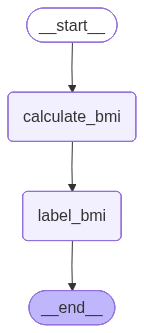

In [15]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())


<!--  -->


In [23]:
#  llm workflow

from langgraph.graph import START, END, StateGraph
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os 
load_dotenv()


True

In [24]:
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [25]:
model=ChatOpenAI(model="gpt-4.1")


In [29]:
class LLMState(TypedDict):
    question : str
    ans : str


In [30]:
def lla_qa(state : LLMState) -> LLMState:
    question = state["question"]
    promt = f"answer the following question properly : {question}"
    answer = model.invoke(promt).content
    state["ans"] = answer
    return state

In [33]:
graph = StateGraph(LLMState)

graph.add_node("llm_qa", lla_qa)

graph.add_edge(START, "llm_qa")
graph.add_edge("llm_qa", END)   

workflow = graph.compile()

intial_state = {'question':"what is langgraph?"}

res = workflow.invoke(intial_state)
print(res)

{'question': 'what is langgraph?', 'ans': "**LangGraph** is an open-source framework designed to help developers build stateful, multi-agent AI applications using **graphs** as a core abstraction. Created by the team behind LangChain, LangGraph extends the capabilities of traditional language model (LLM) workflows by supporting complex, dynamic interactions between multiple agents or components.\n\n**Key Features of LangGraph:**\n\n1. **Graph-Based Workflows**:  \n   Instead of linear chains, LangGraph lets you represent your AI application's logic as a graph, where nodes can be agents, tools, or language models, and edges represent possible flows or transitions between tasks.\n\n2. **Stateful Execution**:  \n   LangGraph tracks the application's state as it traverses through the graph, allowing for context-aware reasoning and history retention across multiple steps or agents.\n\n3. **Multi-Agent Collaboration**:  \n   Easily coordinate and orchestrate multiple AI agents or models with

In [6]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict, Literal

In [3]:
class QuadState(TypedDict):

    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result: str

In [7]:
def show_equation(state: QuadState):

    equation = f'{state["a"]}x2{state["b"]}x{state["c"]}'

    return {'equation':equation}

def calculate_discriminant(state: QuadState):

    discriminant = state["b"]**2 - (4*state["a"]*state["c"])

    return {'discriminant': discriminant}

def real_roots(state: QuadState):

    root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

    result = f'The roots are {root1} and {root2}'

    return {'result': result}

def repeated_roots(state: QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}

def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'result': result}

def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

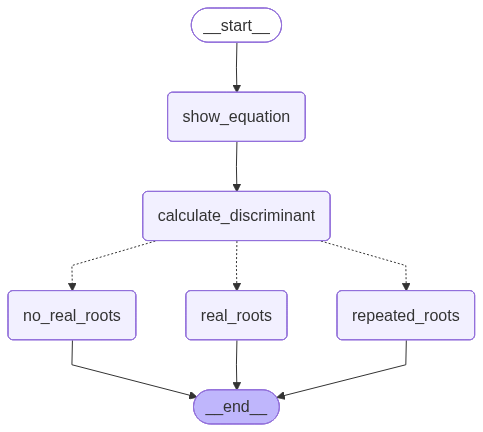

In [11]:
graph = StateGraph(QuadState)

# creating an nodes
graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)


# creating an edges 
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_condition)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_roots", END)
graph.add_edge("no_real_roots", END)

workflow = graph.compile()
workflow



In [12]:
initial_state = {
    'a': 2, 
    'b': 4,
    'c': 2
}

workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x24x2',
 'discriminant': 0,
 'result': 'Only repeating root is -1.0'}

In [14]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o-mini")


In [17]:
from pydantic import BaseModel, Field

In [18]:
class SentimentSchema(BaseModel):
    sentiment: Literal["positive", "negative"] = Field(description="The sentiment of the review")
    

In [19]:
class DiagnosisSchema(BaseModel):
    issue_type: Literal["UX", "Performance", "Bug", "Support", "Other"] = Field(description='The category of issue mentioned in the review')
    tone: Literal["angry", "frustrated", "disappointed", "calm"] = Field(description='The emotional tone expressed by the user')
    urgency: Literal["low", "medium", "high"] = Field(description='How urgent or critical the issue appears to be')


In [20]:
structured_model = model.with_structured_output(SentimentSchema)
structured_model2 = model.with_structured_output(DiagnosisSchema)


In [22]:
prompt = 'What is the sentiment of the following review - The software too bad'
structured_model.invoke(prompt).sentiment

'negative'

In [23]:
# defining the state 
class ReviewState(TypedDict):
    review : str
    sentiment : Literal["positive", "negative"]
    diagnosis : dict
    response : str

In [28]:
def find_sentiment(state: ReviewState):

    prompt = f'For the following review find out the sentiment \n {state["review"]}'
    sentiment = structured_model.invoke(prompt).sentiment

    return {'sentiment': sentiment}
# ❓ Why does this function return only {"sentiment": sentiment} and not the full state?
# 🔑 Short answer
# Because LangGraph automatically merges partial updates into the full state.
# You only return what this node changes.


def check_sentiment(state: ReviewState) -> Literal["positive_response", "run_diagnosis"]:

    if state['sentiment'] == 'positive':
        return 'positive_response'
    else:
        return 'run_diagnosis'
    
def positive_response(state: ReviewState):

    prompt = f"""Write a warm thank-you message in response to this review:
    \n\n\"{state['review']}\"\n
Also, kindly ask the user to leave feedback on our website."""
    
    response = model.invoke(prompt).content

    return {'response': response}

def run_diagnosis(state: ReviewState):

    prompt = f"""Diagnose this negative review:\n\n{state['review']}\n"
    "Return issue_type, tone, and urgency.
"""
    response = structured_model2.invoke(prompt)

    return {'diagnosis': response.model_dump()}

def negative_response(state: ReviewState):

    diagnosis = state['diagnosis']

    prompt = f"""You are a support assistant.
The user had a '{diagnosis['issue_type']}' issue, sounded '{diagnosis['tone']}', and marked urgency as '{diagnosis['urgency']}'.
Write an empathetic, helpful resolution message.
"""
    response = model.invoke(prompt).content

    return {'response': response}
    

In [29]:
graph = StateGraph(ReviewState)

graph.add_node('find_sentiment', find_sentiment)
graph.add_node('positive_response', positive_response)
graph.add_node('run_diagnosis', run_diagnosis)
graph.add_node('negative_response', negative_response)

graph.add_edge(START, 'find_sentiment')

graph.add_conditional_edges('find_sentiment', check_sentiment)

graph.add_edge('positive_response', END)

graph.add_edge('run_diagnosis', 'negative_response')
graph.add_edge('negative_response', END)

workflow = graph.compile()

In [30]:
intial_state={
    'review': "I’ve been trying to log in for over an hour now, and the app keeps freezing on the authentication screen. I even tried reinstalling it, but no luck. This kind of bug is unacceptable, especially when it affects basic functionality."
}
workflow.invoke(intial_state)

{'review': 'I’ve been trying to log in for over an hour now, and the app keeps freezing on the authentication screen. I even tried reinstalling it, but no luck. This kind of bug is unacceptable, especially when it affects basic functionality.',
 'sentiment': 'negative',
 'diagnosis': {'issue_type': 'Bug', 'tone': 'frustrated', 'urgency': 'high'},
 'response': "Subject: We’re Here to Help!\n\nHi [User's Name],\n\nI completely understand how frustrating it can be to encounter a bug, especially when it feels urgent. I want you to know that we're here to help you resolve this issue as quickly as possible.\n\nCould you please provide me with a bit more information about the bug you're experiencing? Details about what you were doing when it occurred, any error messages you received, and the device or platform you’re using would be incredibly helpful. This information will allow us to diagnose the problem more effectively.\n\nThank you for your patience as we work through this together. Your 

In [13]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [14]:
load_dotenv()
llm = ChatOpenAI()

In [15]:
class JokeState(TypedDict):
    topic : str
    joke : str
    explanation : str

In [16]:
def generate_joke(state: JokeState):

    prompt = f'generate a joke on the topic {state["topic"]}'
    response = llm.invoke(prompt).content

    return {'joke': response}

In [17]:
def generate_explanation(state: JokeState):

    prompt = f'write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content

    return {'explanation': response}

In [1]:
print("Subodh")

Subodh


In [1]:
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from dotenv import load_dotenv
from langchain_community.document_loaders import PyPDFLoader

from langchain_community.vectorstores import FAISS
from langchain_core.tools import tool
from langgraph.graph import StateGraph, START
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.prebuilt import ToolNode, tools_condition

In [2]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [3]:
load_dotenv()

True

In [4]:
llm = ChatOpenAI(model='gpt-4o-mini')

In [11]:
loader = PyPDFLoader("intro-to-ml.pdf")
docs = loader.load()


In [10]:
!pip install pypdf

  Using cached pypdf-6.6.2-py3-none-any.whl.metadata (7.1 kB)
Using cached pypdf-6.6.2-py3-none-any.whl (329 kB)


In [13]:
from langgraph.graph.message import add_messages

class CHatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]
